<a href="https://colab.research.google.com/github/gulbentiryaki/hu-bby261-2020/blob/main/proje_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

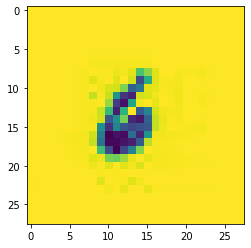

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_index = 1
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

x_train.shape

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)


png = Image.open("/content/drive/MyDrive/Colab Notebooks/HU-BBY261-2020/rakam.jpg").convert("L")
png = np.resize(png, (28,28,1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28))

tahminDizi = model.predict(pngBinary.reshape(1, 28, 28, 1))
tahminSayi = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminDizi)
print(tahminSayi)
